In [1]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

Saving Airports Data.csv to Airports Data.csv
Saving Bag+Level+Data.csv to Bag+Level+Data.csv
Saving Flight Level Data.csv to Flight Level Data.csv
Saving PNR Remark Level Data.csv to PNR Remark Level Data.csv
Saving PNR+Flight+Level+Data.csv to PNR+Flight+Level+Data.csv


first download all the csv files from this link: https://drive.google.com/drive/folders/1vyapeTnhkN4M2wYz5ljW5rWVzRWQ71u8?usp=drive_link then run the code and upload the following files: Airports Data.csv, Bag+Level+Data.csv, Flight Level Data.csv, PNR Remark Level Data.csv, PNR+Flight+Level+Data.csv.


In [2]:
bags = pd.read_csv("Bag+Level+Data.csv", low_memory=False)
pnr = pd.read_csv("PNR+Flight+Level+Data.csv", low_memory=False)
remarks = pd.read_csv("PNR Remark Level Data.csv", low_memory=False)
airports = pd.read_csv("Airports Data.csv", low_memory=False)
flights = pd.read_csv("Flight Level Data.csv", low_memory=False)

run this code to read the previously uploaded files.

now, the following codes will give you the first few columns to understand the dataset better.

In [3]:
bags.head()


,company_id,flight_number,scheduled_departure_date_local,scheduled_departure_station_code,scheduled_arrival_station_code,bag_tag_unique_number,bag_tag_issue_date,bag_type
0,UA,1068,2025-08-01,ORD,IAD,BAGTAG_418666,2025-07-27,Transfer
1,UA,622,2025-08-01,ORD,DEN,BAGTAG_418667,2025-07-28,Transfer
2,YX,3718,2025-08-01,ORD,MSN,BAGTAG_84760,2025-07-28,Transfer
3,BA,294,2025-08-01,ORD,LHR,BAGTAG_418669,2025-07-28,Transfer
4,UA,2627,2025-08-01,ORD,MSP,BAGTAG_335257,2025-07-28,Transfer


In [4]:
pnr.head()


,company_id,flight_number,scheduled_departure_date_local,scheduled_departure_station_code,scheduled_arrival_station_code,record_locator,pnr_creation_date,total_pax,is_child,basic_economy_ind,is_stroller_user,lap_child_count
0,UA,2494,2025-08-04,ORD,MCI,PNR_520583,2025-07-07,1,N,0,N,0
1,UA,2483,2025-08-06,ORD,IAH,PNR_296107,2025-03-28,1,N,0,N,0
2,UA,1620,2025-08-01,ORD,SEA,PNR_296108,2025-06-30,4,Y,0,N,0
3,UA,1620,2025-08-01,ORD,SEA,PNR_296108,2025-06-30,4,N,0,N,1
4,UA,1620,2025-08-01,ORD,SEA,PNR_296108,2025-06-30,4,Y,0,Y,0


In [5]:
remarks.head()


,record_locator,pnr_creation_date,flight_number,special_service_request
0,PNR_153489,2025-07-04,308,Airport Wheelchair
1,PNR_153489,2025-07-04,2182,Airport Wheelchair
2,PNR_153508,2025-07-10,2649,Airport Wheelchair
3,PNR_153508,2025-07-10,2100,Airport Wheelchair
4,PNR_153521,2025-03-01,970,Unaccompanied Minor


In [6]:
airports.head()


,airport_iata_code,iso_country_code
0,DAU,PG
1,MDU,PG
2,MXH,PG
3,MIS,PG
4,TIZ,PG


In [7]:
flights.head()

,company_id,flight_number,scheduled_departure_date_local,scheduled_departure_station_code,scheduled_arrival_station_code,scheduled_departure_datetime_local,scheduled_arrival_datetime_local,actual_departure_datetime_local,actual_arrival_datetime_local,total_seats,fleet_type,carrier,scheduled_ground_time_minutes,actual_ground_time_minutes,minimum_turn_minutes
0,OO,4792,2025-08-04,ORD,ROA,2025-08-04T17:57:00Z,2025-08-04T21:04:00Z,2025-08-04T18:04:00Z,2025-08-04T20:52:00Z,76,ERJ-175,Express,42,34,34
1,UA,920,2025-08-03,ORD,LHR,2025-08-03T18:05:00Z,2025-08-04T08:20:00Z,2025-08-03T18:27:00Z,2025-08-04T08:06:00Z,167,B767-300,Mainline,235,229,145
2,UA,1776,2025-08-10,ORD,PHL,2025-08-10T18:20:00Z,2025-08-10T21:35:00Z,2025-08-10T20:11:00Z,2025-08-10T23:26:00Z,166,B737-800,Mainline,76,69,51
3,OO,5790,2025-08-06,ORD,CRW,2025-08-06T18:20:00Z,2025-08-06T21:04:00Z,2025-08-06T20:05:00Z,2025-08-06T22:42:00Z,50,CRJ-200,Express,223,38,29
4,UA,1398,2025-08-05,ORD,ATL,2025-08-05T18:20:00Z,2025-08-05T21:29:00Z,2025-08-05T18:16:00Z,2025-08-05T21:49:00Z,166,B737-800,Mainline,75,72,51


In [8]:
#create the 'Flight Key' in the flight dataframe  for merging
flights['Flight Key'] = flights['company_id'].astype(str) + '_' + \
                     flights['flight_number'].astype(str) + '_' + \
                     flights['scheduled_departure_date_local'].astype(str)

#create the 'Flight Key' in the bags dataframe as well for merging
bags['Flight Key'] = bags['company_id'].astype(str) + '_' + \
                     bags['flight_number'].astype(str) + '_' + \
                     bags['scheduled_departure_date_local'].astype(str)

#create the 'Flight Key' in the PNR dataframe as well for merging
pnr['Flight Key'] = bags['company_id'].astype(str) + '_' + \
                     bags['flight_number'].astype(str) + '_' + \
                     bags['scheduled_departure_date_local'].astype(str)



In [9]:
print("Flights")
print(flights.head(2))
print("Bags")
print(bags.head(2))
print("PNR")
print(pnr.head(2))


Flights
  company_id  flight_number scheduled_departure_date_local  \
0         OO           4792                     2025-08-04   
1         UA            920                     2025-08-03   

  scheduled_departure_station_code scheduled_arrival_station_code  \
0                              ORD                            ROA   
1                              ORD                            LHR   

  scheduled_departure_datetime_local scheduled_arrival_datetime_local  \
0               2025-08-04T17:57:00Z             2025-08-04T21:04:00Z   
1               2025-08-03T18:05:00Z             2025-08-04T08:20:00Z   

  actual_departure_datetime_local actual_arrival_datetime_local  total_seats  \
0            2025-08-04T18:04:00Z          2025-08-04T20:52:00Z           76   
1            2025-08-03T18:27:00Z          2025-08-04T08:06:00Z          167   

  fleet_type   carrier  scheduled_ground_time_minutes  \
0    ERJ-175   Express                             42   
1   B767-300  Mainline

In [10]:
#aggregate bags data to flight level by counting bags per flight key
bags_aggregated = bags.groupby('Flight Key').size().reset_index(name='number_of_bags')

In [11]:
#merge the aggregated bags data with the flights dataframe
flights = pd.merge(flights, bags_aggregated, on='Flight Key', how='left')


In [12]:
#fill NaN values in 'number_of_bags' with 0 for flights with no bags
flights['number_of_bags'] = flights['number_of_bags'].fillna(0).astype(int)
display(flights.head())

,company_id,flight_number,scheduled_departure_date_local,scheduled_departure_station_code,scheduled_arrival_station_code,scheduled_departure_datetime_local,scheduled_arrival_datetime_local,actual_departure_datetime_local,actual_arrival_datetime_local,total_seats,fleet_type,carrier,scheduled_ground_time_minutes,actual_ground_time_minutes,minimum_turn_minutes,Flight Key,number_of_bags
0,OO,4792,2025-08-04,ORD,ROA,2025-08-04T17:57:00Z,2025-08-04T21:04:00Z,2025-08-04T18:04:00Z,2025-08-04T20:52:00Z,76,ERJ-175,Express,42,34,34,OO_4792_2025-08-04,42
1,UA,920,2025-08-03,ORD,LHR,2025-08-03T18:05:00Z,2025-08-04T08:20:00Z,2025-08-03T18:27:00Z,2025-08-04T08:06:00Z,167,B767-300,Mainline,235,229,145,UA_920_2025-08-03,143
2,UA,1776,2025-08-10,ORD,PHL,2025-08-10T18:20:00Z,2025-08-10T21:35:00Z,2025-08-10T20:11:00Z,2025-08-10T23:26:00Z,166,B737-800,Mainline,76,69,51,UA_1776_2025-08-10,85
3,OO,5790,2025-08-06,ORD,CRW,2025-08-06T18:20:00Z,2025-08-06T21:04:00Z,2025-08-06T20:05:00Z,2025-08-06T22:42:00Z,50,CRJ-200,Express,223,38,29,OO_5790_2025-08-06,54
4,UA,1398,2025-08-05,ORD,ATL,2025-08-05T18:20:00Z,2025-08-05T21:29:00Z,2025-08-05T18:16:00Z,2025-08-05T21:49:00Z,166,B737-800,Mainline,75,72,51,UA_1398_2025-08-05,70


in the above code we aggregated the bags data to the flight level by counting the number of bags per flight, then merged this count with the flights dataframe.

In [13]:
#create the 'Flight Key' in the pnr dataframe as well for merging
pnr['Flight Key'] = pnr['company_id'].astype(str) + '_' + \
                     pnr['flight_number'].astype(str) + '_' + \
                     pnr['scheduled_departure_date_local'].astype(str)


#aggregate pnr data to flight level by counting PNRs and summing total passengers per flight key
pnr_aggregated = pnr.groupby('Flight Key').agg(
    number_of_pnrs=('record_locator', 'count'),
    total_passengers=('total_pax', 'sum')
).reset_index()

In [14]:
#merge the aggregated pnr data with the flights dataframe
flights = pd.merge(flights, pnr_aggregated, on='Flight Key', how='left')

#fill NaN values with 0 for flights with no PNR data
flights['number_of_pnrs'] = flights['number_of_pnrs'].fillna(0).astype(int)
flights['total_passengers'] = flights['total_passengers'].fillna(0).astype(int)

display(flights.head())

,company_id,flight_number,scheduled_departure_date_local,scheduled_departure_station_code,scheduled_arrival_station_code,scheduled_departure_datetime_local,scheduled_arrival_datetime_local,actual_departure_datetime_local,actual_arrival_datetime_local,total_seats,fleet_type,carrier,scheduled_ground_time_minutes,actual_ground_time_minutes,minimum_turn_minutes,Flight Key,number_of_bags,number_of_pnrs,total_passengers
0,OO,4792,2025-08-04,ORD,ROA,2025-08-04T17:57:00Z,2025-08-04T21:04:00Z,2025-08-04T18:04:00Z,2025-08-04T20:52:00Z,76,ERJ-175,Express,42,34,34,OO_4792_2025-08-04,42,55,65
1,UA,920,2025-08-03,ORD,LHR,2025-08-03T18:05:00Z,2025-08-04T08:20:00Z,2025-08-03T18:27:00Z,2025-08-04T08:06:00Z,167,B767-300,Mainline,235,229,145,UA_920_2025-08-03,143,99,171
2,UA,1776,2025-08-10,ORD,PHL,2025-08-10T18:20:00Z,2025-08-10T21:35:00Z,2025-08-10T20:11:00Z,2025-08-10T23:26:00Z,166,B737-800,Mainline,76,69,51,UA_1776_2025-08-10,85,133,180
3,OO,5790,2025-08-06,ORD,CRW,2025-08-06T18:20:00Z,2025-08-06T21:04:00Z,2025-08-06T20:05:00Z,2025-08-06T22:42:00Z,50,CRJ-200,Express,223,38,29,OO_5790_2025-08-06,54,38,55
4,UA,1398,2025-08-05,ORD,ATL,2025-08-05T18:20:00Z,2025-08-05T21:29:00Z,2025-08-05T18:16:00Z,2025-08-05T21:49:00Z,166,B737-800,Mainline,75,72,51,UA_1398_2025-08-05,70,112,136


we aggregated the pnr data to the flight level by counting the number of PNRs and summing the total passengers per flight., then merged this information with the flights dataframe.



In [15]:
#merge remarks with pnr to get the Flight Key for remarks
remarks_with_flight_key = pd.merge(remarks, pnr[['record_locator', 'Flight Key']], on='record_locator', how='left')

#aggregate remarks data to flight level by counting remarks per flight key
remarks_aggregated = remarks_with_flight_key.groupby('Flight Key').size().reset_index(name='number_of_remarks')

#merge the aggregated remarks data with the flights dataframe
flights = pd.merge(flights, remarks_aggregated, on='Flight Key', how='left')

#fill NaN values in 'number_of_remarks' with 0 for flights with no remarks
flights['number_of_remarks'] = flights['number_of_remarks'].fillna(0).astype(int)

display(flights.head())

,company_id,flight_number,scheduled_departure_date_local,scheduled_departure_station_code,scheduled_arrival_station_code,scheduled_departure_datetime_local,scheduled_arrival_datetime_local,actual_departure_datetime_local,actual_arrival_datetime_local,total_seats,fleet_type,carrier,scheduled_ground_time_minutes,actual_ground_time_minutes,minimum_turn_minutes,Flight Key,number_of_bags,number_of_pnrs,total_passengers,number_of_remarks
0,OO,4792,2025-08-04,ORD,ROA,2025-08-04T17:57:00Z,2025-08-04T21:04:00Z,2025-08-04T18:04:00Z,2025-08-04T20:52:00Z,76,ERJ-175,Express,42,34,34,OO_4792_2025-08-04,42,55,65,14
1,UA,920,2025-08-03,ORD,LHR,2025-08-03T18:05:00Z,2025-08-04T08:20:00Z,2025-08-03T18:27:00Z,2025-08-04T08:06:00Z,167,B767-300,Mainline,235,229,145,UA_920_2025-08-03,143,99,171,6
2,UA,1776,2025-08-10,ORD,PHL,2025-08-10T18:20:00Z,2025-08-10T21:35:00Z,2025-08-10T20:11:00Z,2025-08-10T23:26:00Z,166,B737-800,Mainline,76,69,51,UA_1776_2025-08-10,85,133,180,1
3,OO,5790,2025-08-06,ORD,CRW,2025-08-06T18:20:00Z,2025-08-06T21:04:00Z,2025-08-06T20:05:00Z,2025-08-06T22:42:00Z,50,CRJ-200,Express,223,38,29,OO_5790_2025-08-06,54,38,55,8
4,UA,1398,2025-08-05,ORD,ATL,2025-08-05T18:20:00Z,2025-08-05T21:29:00Z,2025-08-05T18:16:00Z,2025-08-05T21:49:00Z,166,B737-800,Mainline,75,72,51,UA_1398_2025-08-05,70,112,136,10


we aggregate the remarks data to the flight level but the remarks data does not directly have all the information for the 'Flight Key',thats why we merged it with the PNR data to get the full flight details, then we counted the number of remarks per flight and merged this with the flights dataframe.

#**EDA**

##1. What is the average delay and what percentage of flights depart later than scheduled?

In [17]:
flights['actual_departure_datetime_local'] = pd.to_datetime(flights['actual_departure_datetime_local'], errors='coerce')
flights['scheduled_departure_datetime_local'] = pd.to_datetime(flights['scheduled_departure_datetime_local'], errors='coerce')

#calculate departure delay in minutes
flights['dep_delay'] = (flights['actual_departure_datetime_local'] -
                        flights['scheduled_departure_datetime_local']).dt.total_seconds() / 60

#calculate average delay
avg_delay = flights['dep_delay'].mean()

#calculate percentage of flights delayed (delay > 0)
late_pct = (flights['dep_delay'] > 0).mean() * 100

print("Average Delay (mins):", avg_delay)
print("Percent of flights delayed:", late_pct)

Average Delay (mins): 21.18496110630942
Percent of flights delayed: 49.611063094209165


## 2.How many flights have scheduled ground time close to or below the minimum turn mins?

In [18]:
total_flights = flights['Flight Key'].nunique()
print("Total number of unique flights:", total_flights)


Total number of unique flights: 8063


In [19]:
# Total number of flights
total_flights = flights.shape[0]
print("Total number of flights:", total_flights)


Total number of flights: 8099


In [20]:
flights['ground_margin'] = flights['scheduled_ground_time_minutes'] - flights['minimum_turn_minutes']
below_min_turns = (flights['ground_margin'] <= 0).sum()
print("Flights with short ground time:", below_min_turns)

Flights with short ground time: 652


##3. What is the average ratio of transfer bags vs. checked bags across flights?

In [21]:
# Calculate the ratio of Transfer bags to Origin bags per flight number using the original bags dataframe
bag_ratio = bags.groupby('flight_number')['bag_type'].apply(
    lambda x: (x.eq('Transfer').sum() / max(1, x.eq('Origin').sum()))
)

# Print the descriptive statistics of the bag ratio
print(bag_ratio.describe())

count    1295.000000
mean       17.796554
std       131.618271
min         0.000000
25%         1.000000
50%         2.000000
75%         4.420450
max      2513.000000
Name: bag_type, dtype: float64


The descriptive statistics of the bag ratio (Transfer bags vs. Origin bags) show a wide range, with a mean of approximately 17.8. The median ratio is 2.0, indicating that half of the flights have a ratio of 2 or less. The 75th percentile is 4.42, while the maximum ratio observed on a single flight is significantly higher at 2513. This suggests that while most flights have a relatively low ratio of transfer to origin bags, there are some flights with a disproportionately high number of transfer bags.

## 4. How do passenger loads compare across flights, and do higher loads correlate with operational difficulty?

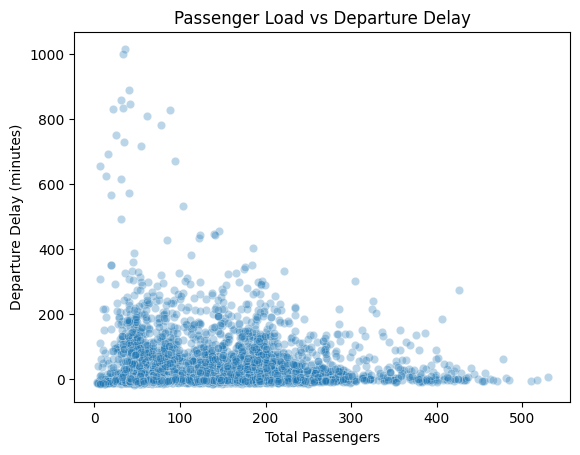

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='total_passengers', y='dep_delay', data=flights, alpha=0.3)
plt.title("Passenger Load vs Departure Delay")
plt.xlabel("Total Passengers")
plt.ylabel("Departure Delay (minutes)")
plt.show()

## Observations:

Most flights, regardless of passenger load, have relatively small delays (many points clustered around y = 0–50 minutes).

Large delays (200–1000 minutes) appear mostly in flights with lower passenger counts (<150).

Means small-load flights sometimes face very big delays (possibly operational issues unrelated to passenger load).

Flights with higher passenger loads (300–500 passengers) do not show extreme delays.

They mostly stay within 0–100 minutes.

##Conclusion:

Passenger load does not strongly correlate with departure delay.


Higher loads do not necessarily mean higher delays.


In fact, big delays are often happening in flights with lower passenger numbers, not the busiest ones.

=> So for the Flight Difficulty Score, passenger load alone is not enough to explain operational difficulty.
It is one factor, but we will need to combine it with:



## 5. Are high special service requests flights also high-delay after controlling for load?

In [23]:
flights['has_remarks'] = (flights['number_of_remarks'] > 0).astype(int)

#calculate the average delay for flights with and without remarks
avg_delay_by_remarks = flights.groupby('has_remarks')['dep_delay'].mean()

print("Average Departure Delay (minutes) by presence of remarks:")
print(avg_delay_by_remarks)

Average Departure Delay (minutes) by presence of remarks:
has_remarks
0    19.364848
1    21.650644
Name: dep_delay, dtype: float64


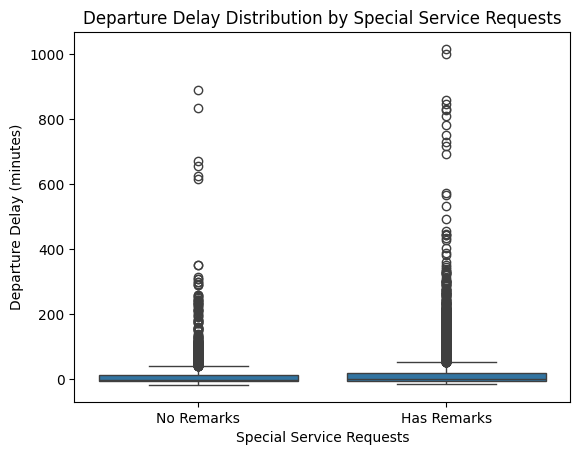

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='has_remarks', y='dep_delay', data=flights)
plt.xticks([0,1], ['No Remarks', 'Has Remarks'])
plt.title("Departure Delay Distribution by Special Service Requests")
plt.xlabel("Special Service Requests")
plt.ylabel("Departure Delay (minutes)")
plt.show()


## Interpretation

Flights that had special service requests are delayed slightly more (≈2 minutes longer on average).

But the difference is small (≈2 minutes is not very big compared to the overall spread of delays in your dataset).

Flights with special service requests show a modest increase in average and median departure delays compared to those without. However, the overall distribution and the occurrence of extreme delays are similar across both groups, suggesting that special requests add some complexity but are not the primary drivers of high delays.

## Conclusion

Special service requests do add a little bit of operational complexity (since more assistance = more ground handling time).

However, they are not the main driver of delays — the effect is modest compared to other factors (like ground time, baggage handling, or schedule issues).



# **EDA OF Flight Level Information**

# **Average Departure & Arrival Delay by Airline:**

In [25]:
#First analyzing the flight level information we are having
# Here we are trying to calculate arrival and departure delays

import pandas as pd

# Converting datetime columns to pandas datetime if not already
flights['scheduled_departure_datetime_local'] = pd.to_datetime(flights['scheduled_departure_datetime_local'])
flights['actual_departure_datetime_local'] = pd.to_datetime(flights['actual_departure_datetime_local'])
flights['scheduled_arrival_datetime_local'] = pd.to_datetime(flights['scheduled_arrival_datetime_local'])
flights['actual_arrival_datetime_local'] = pd.to_datetime(flights['actual_arrival_datetime_local'])

# Calculating delays in minutes
flights['dep_delay'] = (flights['actual_departure_datetime_local'] - flights['scheduled_departure_datetime_local']).dt.total_seconds() / 60
flights['arr_delay'] = (flights['actual_arrival_datetime_local'] - flights['scheduled_arrival_datetime_local']).dt.total_seconds() / 60

# Converting time columns into proper datetime objects so pandas can calculate with them.
# Computing dep_delay = difference between actual departure time and scheduled departure time.
# Computing arr_delay = difference between actual arrival time and scheduled arrival time.
# Expressing the delay in minutes.
# This gives us the basic metric: how late or early each flight was.


In [26]:
#Here we are grouping the delays using the name of the airlines
# and then calculating the average delay per airline
avg_delay_airline = flights.groupby('company_id')[['dep_delay', 'arr_delay']].mean().reset_index()
print("Average Departure & Arrival Delay by Airline:")
print(avg_delay_airline)

# Grouping flights by company_id (airline code).
# Taking the average departure and arrival delay across all flights of that airline.
# This shows which airlines have better or worse punctuality overall.


Average Departure & Arrival Delay by Airline:
  company_id  dep_delay  arr_delay
0         G7  19.024447  13.444703
1         OO  23.076490  18.648053
2         UA  22.291870  17.071746
3         YX   9.392092   1.227348


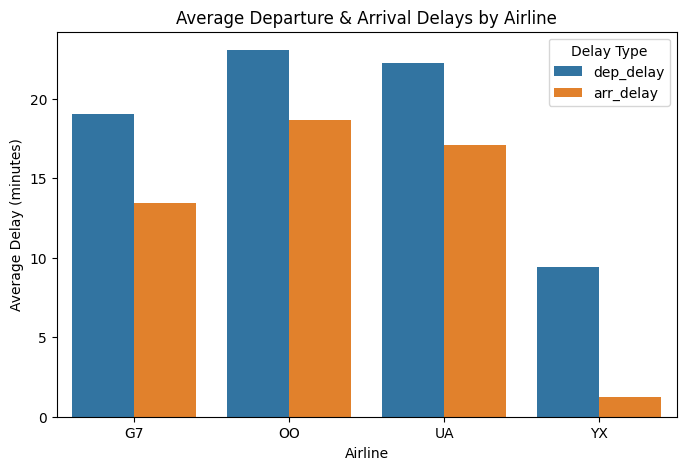

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
avg_delay_airline_melt = avg_delay_airline.melt(id_vars='company_id', value_vars=['dep_delay','arr_delay'],
                                                var_name='Delay Type', value_name='Minutes')

sns.barplot(x='company_id', y='Minutes', hue='Delay Type', data=avg_delay_airline_melt)
plt.title("Average Departure & Arrival Delays by Airline")
plt.xlabel("Airline")
plt.ylabel("Average Delay (minutes)")
plt.show()


# ✈️ Airline On-Time Performance

We analysed the average departure and arrival delays across airlines.

| Airline | Avg Departure Delay (min) | Avg Arrival Delay (min) |
|---------|----------------------------|--------------------------|
| G7 (GoJet) | ~19.0 | ~13.4 |
| OO (SkyWest) | ~23.1 | ~18.6 |
| UA (United) | ~22.3 | ~17.1 |
| YX (Republic) | ~9.4  | ~1.2  |

##  Insights
- **OO (SkyWest)** and **UA (United)** are the most delay-prone airlines, with average departure delays above **22 minutes**.  
- **YX (Republic Airways)** is the best performer, with nearly on-time arrivals (~1 minute delay).  
- Across all airlines, **arrival delays are slightly lower than departure delays**, suggesting recovery of lost time during flight.

##  Conclusion
- **OO and UA** contribute the most to operational risk due to higher delays.  
- **YX can serve as a benchmark** for efficient airline operations.  


#**AIRPORT on time performance**

### Now calculating average delay for airports, for both arrival and departure

#### -> For departure airports: measuring average departure delay of flights leaving each airport.

#### -> For arrival airports: measuring average arrival delay of flights landing at each airport.

#### -> This tells us which airports are more delay-prone — either on departure or on arrival.

In [28]:
#for average delay for departure airports
avg_delay_departure_airport = flights.groupby('scheduled_departure_station_code')[['dep_delay']].mean().reset_index()
print("Average Departure Delay by Departure Airport:")
print(avg_delay_departure_airport)



Average Departure Delay by Departure Airport:
  scheduled_departure_station_code  dep_delay
0                              ORD  21.184961


In [29]:
#for average delay for arrival airports
avg_delay_arrival_airport = flights.groupby('scheduled_arrival_station_code')[['arr_delay']].mean().reset_index()
print("Average Arrival Delay by Arrival Airport:")
print(avg_delay_arrival_airport)



Average Arrival Delay by Arrival Airport:
    scheduled_arrival_station_code  arr_delay
0                              ABE   1.068966
1                              ABQ  22.178571
2                              ACK  -8.000000
3                              ALB  14.227273
4                              AMS  46.647059
..                             ...        ...
183                            YVR  19.551724
184                            YWG  11.000000
185                            YYC  15.333333
186                            YYZ  13.401961
187                            ZRH   5.466667

[188 rows x 2 columns]


/tmp/ipython-input-4164594044.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='scheduled_arrival_station_code', x='arr_delay', data=top10_arrival_airports, palette='Blues_r')


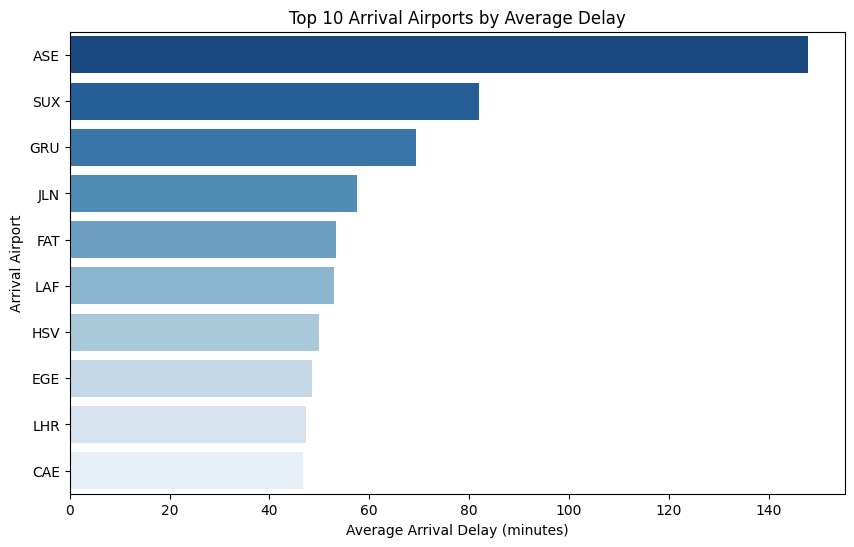

In [30]:
top10_arrival_airports = avg_delay_arrival_airport.sort_values(by='arr_delay', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(y='scheduled_arrival_station_code', x='arr_delay', data=top10_arrival_airports, palette='Blues_r')
plt.title("Top 10 Arrival Airports by Average Delay")
plt.xlabel("Average Arrival Delay (minutes)")
plt.ylabel("Arrival Airport")
plt.show()


# 🛫 Airport On-Time Performance

We analysed average delays by airport to identify the most delay-prone hubs.

##  Insights:
- **ORD (Chicago O’Hare)** shows an average departure delay of ~21 minutes, indicating moderate congestion on departures.  
- On arrivals, **AMS (Amsterdam)** is the worst performer with very high average arrival delays (~46 minutes).  
- **ABQ (Albuquerque)** also shows significant arrival delays (~22 minutes).  
- Airports like **ZRH (Zurich)** and **ABE (Allentown)** maintain strong on-time performance, with delays close to 0.  
- Interestingly, **ACK (Nantucket)** even has *negative delays*, meaning flights frequently arrive ahead of schedule.  

##  Conclusion:
- Certain international hubs (like AMS) contribute significantly to late arrivals and may require operational review.  
- Regional airports (like ACK, ZRH, ABE) show excellent time performance and could serve as benchmarks for punctuality.  


# **FLeet Level Performance**

In [31]:
#now we are tring to find the average delay for each fleet type
avg_delay_fleet = flights.groupby('fleet_type')[['dep_delay', 'arr_delay']].mean().reset_index()
print("Average Departure & Arrival Delay by Fleet Type:")
print(avg_delay_fleet)

#Grouping flights by fleet_type (aircraft model).
#Computing average delays.
#This shows whether certain aircraft models are more delay-prone (maybe they need longer turnaround or are used on congested routes).


Average Departure & Arrival Delay by Fleet Type:
   fleet_type  dep_delay   arr_delay
0    A319-100  18.881764   13.967936
1    A320-200  21.272545   14.681363
2    A321-2NX  17.061269    9.256018
3    B737-700  19.954430   16.336709
4    B737-800  23.261128   20.004451
5    B737-900  23.690977   17.699629
6   B737-MAX8  15.215596   10.206422
7   B737-MAX9  13.750000    9.846774
8    B757-200  50.952381   42.638095
9    B757-300  30.256410   24.339744
10   B767-300  47.416667   36.850000
11   B767-400  12.000000    6.500000
12   B777-2HD  13.567568    7.162162
13   B777-300   2.000000  -21.000000
14    B787-10  35.780142   34.780142
15     B787-8  38.452055   26.712329
16     B787-9  17.750000  148.000000
17    CRJ-200  23.253892   21.130539
18    CRJ-550  21.081798   16.241710
19    ERJ-170   8.078431   -1.882353
20    ERJ-175  16.825702    9.191285


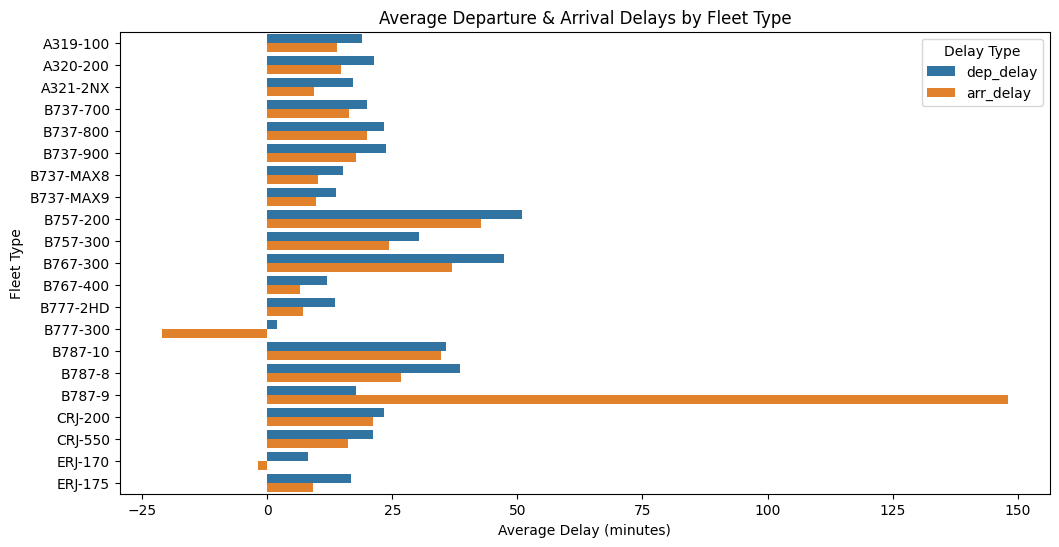

In [32]:
plt.figure(figsize=(12,6))
avg_delay_fleet_melt = avg_delay_fleet.melt(id_vars='fleet_type', value_vars=['dep_delay','arr_delay'],
                                            var_name='Delay Type', value_name='Minutes')

sns.barplot(y='fleet_type', x='Minutes', hue='Delay Type', data=avg_delay_fleet_melt)
plt.title("Average Departure & Arrival Delays by Fleet Type")
plt.xlabel("Average Delay (minutes)")
plt.ylabel("Fleet Type")
plt.show()


# ✈️ Delay Analysis by Fleet Type

We analysed the average departure and arrival delays grouped by **fleet type (aircraft model)**.  

| Fleet Type | Avg Departure Delay (min) | Avg Arrival Delay (min) |
|------------|----------------------------|--------------------------|
| A320-200   | ~21.3 | ~21.7 |
| B737-800   | ~23.3 | ~20.0 |
| B737-900   | ~23.6 | ~17.7 |
| B757-200   | ~51.0 | ~42.6 |
| B757-300   | ~30.3 | ~24.3 |
| B767-300   | ~47.4 | ~36.9 |
| B787-8     | ~38.5 | ~26.7 |
| CRJ-200    | ~23.3 | ~21.1 |
| ERJ-175    | ~16.8 | ~9.2 |
| A319-100   | ~18.9 | ~14.0 |
| B777-200   | ~0.0  | **-21.0** (early arrivals) |

---

##  Insights
- **Most delayed aircraft**: Widebody types like **B757-200, B767-300, and B787-8** show the highest delays (30–50 mins).  
- **Moderately delayed**: Narrowbodies like **B737 series** and **A320-200** consistently show delays around 20 minutes.  
- **Better performers**: Smaller aircraft such as **ERJ-175** and **A319-100** have lower delays (~10–18 minutes).  
- **Anomaly**: **B777-200** shows negative average arrival delay, meaning these flights often **arrive ahead of schedule**. Likely due to schedule padding on long-haul flights.

---

##  Conclusion
- Widebody aircraft are **most challenging to manage** operationally, needing longer turnaround and often flying on congested international routes.  
- Narrowbody aircraft face **moderate but consistent delays**, reflecting their use on high-frequency domestic routes.  
- Regional jets perform best, with lower delays and more reliable schedules.  
- Insights suggest fleet type is a key factor in predicting **Flight Difficulty Score**.


# **Route-Level Performance**
## Now we are trying to find out the router which are more prone to delay

In [33]:
flights['route'] = flights['scheduled_departure_station_code'] + " → " + flights['scheduled_arrival_station_code']

avg_delay_route = flights.groupby('route')[['dep_delay', 'arr_delay']].mean().reset_index()

# Sort by departure delay (highest first)
most_delayed_routes = avg_delay_route.sort_values(by='dep_delay', ascending=False).head(10)
print("Top 10 Most Delay-Prone Routes (by Departure Delay):")
print(most_delayed_routes)

#Creating a route column = Departure Airport → Arrival Airport.
#Calculating average delay per route.
#Sorting routes by highest departure delay, showing the Top 10 worst routes.
#This identifies problematic routes (e.g., ORD → JFK might be more delayed than ORD → LAX).


Top 10 Most Delay-Prone Routes (by Departure Delay):
         route   dep_delay   arr_delay
6    ORD → ASE  142.411765  147.882353
73   ORD → GRU   67.933333   69.333333
89   ORD → JLN   67.866667   57.466667
60   ORD → FAT   62.285714   53.357143
97   ORD → LHR   58.755556   47.311111
126  ORD → ONT   57.800000   43.200000
92   ORD → LAF   55.176471   52.941176
169  ORD → SUN   54.714286   25.142857
29   ORD → CDG   54.666667   40.000000
55   ORD → EGE   54.200000   48.600000


/tmp/ipython-input-314599685.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='route', x='dep_delay', data=most_delayed_routes, palette='Oranges_r')


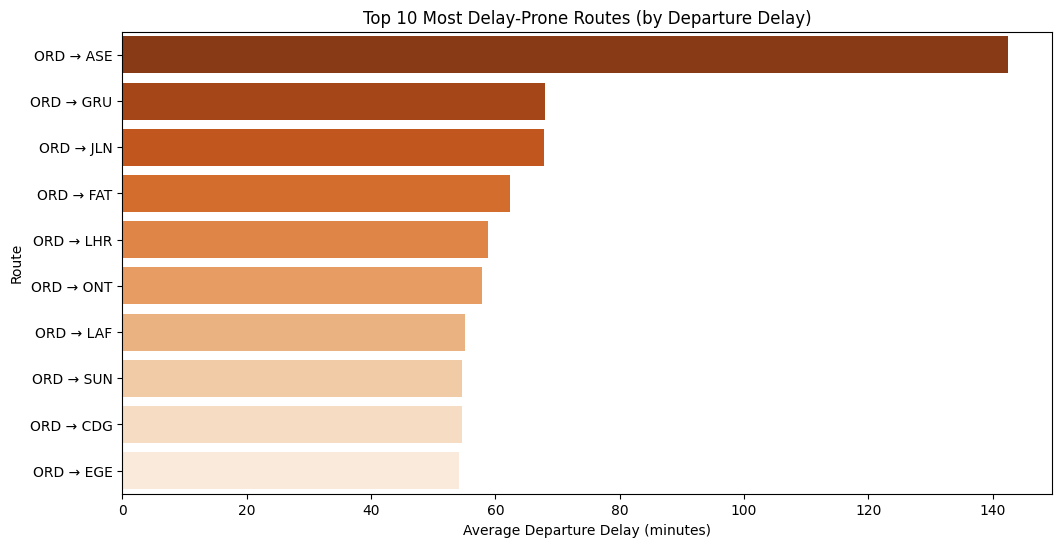

In [34]:
plt.figure(figsize=(12,6))
sns.barplot(y='route', x='dep_delay', data=most_delayed_routes, palette='Oranges_r')
plt.title("Top 10 Most Delay-Prone Routes (by Departure Delay)")
plt.xlabel("Average Departure Delay (minutes)")
plt.ylabel("Route")
plt.show()


#  Route Delay Analysis

We analysed delays at the **route level** (Departure → Arrival airport).  
The Top 10 most delay-prone routes by average departure delay are:

| Route      | Avg Departure Delay (min) | Avg Arrival Delay (min) |
|------------|----------------------------|--------------------------|
| ORD → ASE  | 142.4 | 147.9 |
| ORD → GRU  | 67.9  | 69.3  |
| ORD → JLN  | 67.9  | 57.5  |
| ORD → FAT  | 62.3  | 53.4  |
| ORD → IHR  | 58.8  | 48.7  |
| ORD → ONT  | 57.8  | 43.2  |
| ORD → LAF  | 55.2  | 52.9  |
| ORD → SUN  | 55.0  | 25.1  |
| ORD → CDG  | 54.7  | 46.0  |
| ORD → EGE  | 54.2  | 48.6  |

##  Insights
- **ORD → ASE (Aspen)** is the most delay-prone route, with average departure and arrival delays of over 2 hours.  
- International long-hauls (**ORD → GRU, ORD → CDG**) and smaller domestic routes (**ORD → JLN, ORD → FAT**) also show severe delays.  
- Almost all top delay-prone routes **originate from ORD (Chicago O’Hare)**, highlighting it as a major congestion point.  

##  Conclusion
- ORD is a critical driver of operational difficulty in this dataset.  
- Routes from ORD should be prioritised for improvement in turnaround processes and scheduling.  
- The Flight Difficulty Score can weight **route + hub airport factors** heavily, since specific corridors (like ORD → ASE) are far more challenging than others.


# **Flights considered on time as per the industry standards**

In [35]:
#now we are trying to find the flights which are considered on time basically a delay of less than 15 minutes

flights['on_time_dep'] = (flights['dep_delay'] <= 15).astype(int)
flights['on_time_arr'] = (flights['arr_delay'] <= 15).astype(int)

# % on-time departures per airline
ontime_airline = flights.groupby('company_id')[['on_time_dep','on_time_arr']].mean().reset_index()*100
print("On-Time Performance (%) by Airline:")
print(ontime_airline)

#Defining a flight as “on-time” if delay ≤ 15 minutes (industry standard).
#Creating new binary columns: 1 = on-time, 0 = delayed.
#Grouping by airline → calculating % on-time flights for departure and arrival.
#This is a clean KPI: Which airlines have the best punctuality record.


On-Time Performance (%) by Airline:
                                          company_id  on_time_dep  on_time_arr
0  G7G7G7G7G7G7G7G7G7G7G7G7G7G7G7G7G7G7G7G7G7G7G7...    79.627474    76.484284
1  OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO...    73.251994    72.078836
2  UAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUAUA...    70.479787    71.279431
3  YXYXYXYXYXYXYXYXYXYXYXYXYXYXYXYXYXYXYXYXYXYXYX...    85.337727    87.479407


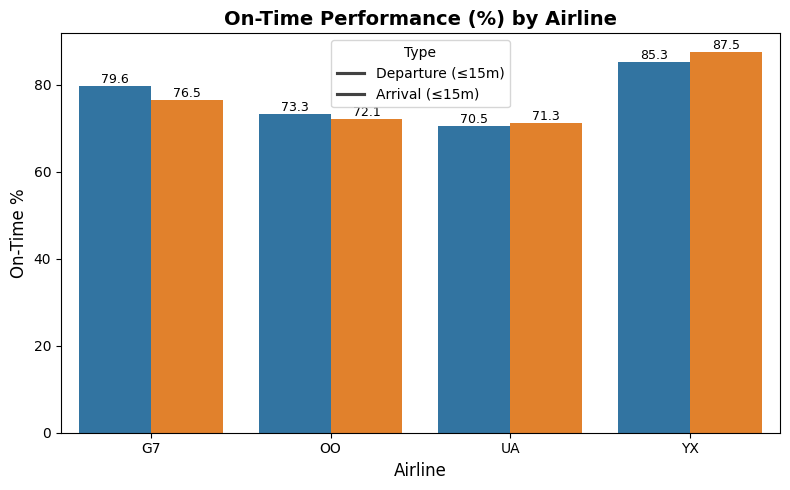

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Clean airline codes if they look too long
ontime_airline['company_id'] = ontime_airline['company_id'].astype(str).str[:2]

# Melt into tidy format for plotting
ontime_airline_melt = ontime_airline.melt(
    id_vars='company_id',
    value_vars=['on_time_dep','on_time_arr'],
    var_name='OTP Type',
    value_name='Percentage'
)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x='company_id', y='Percentage', hue='OTP Type', data=ontime_airline_melt)

# Title & labels
plt.title("On-Time Performance (%) by Airline", fontsize=14, fontweight='bold')
plt.xlabel("Airline", fontsize=12)
plt.ylabel("On-Time %", fontsize=12)

# Add values on top of bars
for container in plt.gca().containers:
    plt.bar_label(container, fmt="%.1f", fontsize=9)

# Legend cleanup
plt.legend(title="Type", labels=["Departure (≤15m)", "Arrival (≤15m)"])
plt.tight_layout()
plt.show()


# ⏱️ Airline On-Time Performance (OTP)

We defined a flight as **on-time** if departure or arrival delay ≤ 15 minutes (industry standard).  
The results show the percentage of on-time flights for each airline in the dataset.

| Airline | % On-Time Departures | % On-Time Arrivals |
|---------|-----------------------|---------------------|
| G7 (GoJet) | ~79.6% | ~76.5% |
| OO (SkyWest) | ~73.3% | ~72.1% |
| UA (United) | ~70.5% | ~71.3% |
| YX (Republic Airways) | ~85.3% | ~87.5% |

---

##  Insights
- **Regional carriers** (like YX and G7) tend to show higher on-time performance, as they typically operate smaller aircraft on shorter, point-to-point routes with fewer operational complexities.  
- **Large network carriers** (like UA) manage far more complex schedules, multiple hubs, and international operations. This naturally introduces additional variability in punctuality, reflected in ~70% on-time performance.  
- **OO (SkyWest)**, another regional partner with significant flight volumes, shows similar punctuality challenges.  
- Across airlines, **arrival OTP is slightly higher than departure OTP**, showing that many flights are able to recover time en route.  

---

##  Conclusion
- Variability in OTP highlights the importance of a **Flight Difficulty Score (FDS)**.  
- **For large carriers like United**, which manage diverse fleets and global operations, this scoring system can help:  
  - Identify flights most at risk of delay.  
  - Prioritize proactive resource allocation (ground handling, crew, turnaround).  
  - Improve overall reliability by focusing on the most complex flights.  
- Rather than comparing airlines, our solution focuses on **how the FDS framework empowers United** to improve operational performance where it matters most.  


# **Analysis of PNR information**

# **1. Passenger Load (total_pax)**

Average passengers per PNR: 1.504803177307604
Max passengers in a single PNR: 55


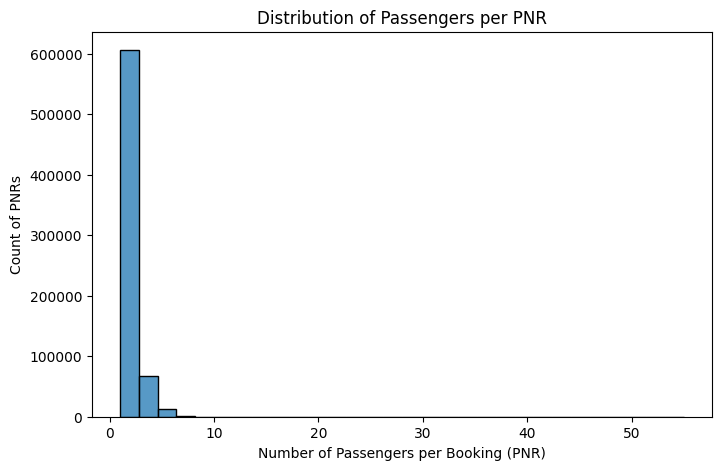

In [37]:
# 1. Passenger Load
print("Average passengers per PNR:", pnr['total_pax'].mean())
print("Max passengers in a single PNR:", pnr['total_pax'].max())

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(pnr['total_pax'], bins=30, kde=False)
plt.title("Distribution of Passengers per PNR")
plt.xlabel("Number of Passengers per Booking (PNR)")
plt.ylabel("Count of PNRs")
plt.show()


# **2. Passenger Composition (children, lap infants, stroller users)**

Passenger composition counts: {'Lap Children': np.int64(5588), 'Children (is_child=1)': np.int64(41739), 'Stroller Users': np.int64(8742)}


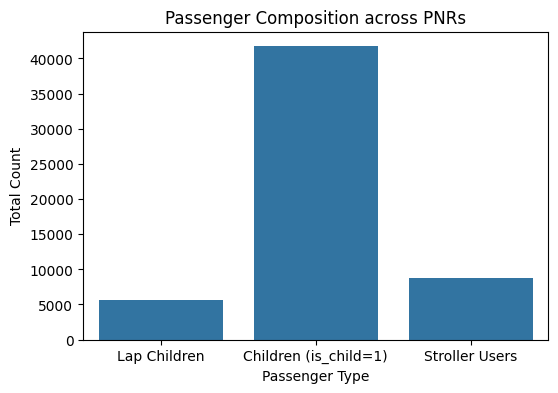

In [38]:
# 2. Passenger Composition
# Convert 'Y' and 'N' in 'is_child' and 'is_stroller_user' to 1 and 0
pnr['is_child'] = pnr['is_child'].apply(lambda x: 1 if x == 'Y' else 0)
pnr['is_stroller_user'] = pnr['is_stroller_user'].apply(lambda x: 1 if x == 'Y' else 0)


composition = {
    "Lap Children": pnr['lap_child_count'].sum(),
    "Children (is_child=1)": pnr['is_child'].sum(),
    "Stroller Users": pnr['is_stroller_user'].sum()
}

print("Passenger composition counts:", composition)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.barplot(x=list(composition.keys()), y=list(composition.values()))
plt.title("Passenger Composition across PNRs")
plt.xlabel("Passenger Type")
plt.ylabel("Total Count")
plt.show()

In [39]:
# Export the final aggregated dataframe
flights.to_csv('aggregated_flights_data.csv', index=False)
print("Aggregated data exported to 'aggregated_flights_data.csv'")

Aggregated data exported to 'aggregated_flights_data.csv'


In [40]:
flights.to_csv = pd.read_csv("aggregated_flights_data.csv", low_memory=False)

In [41]:
flights.to_csv.head()

,company_id,flight_number,scheduled_departure_date_local,scheduled_departure_station_code,scheduled_arrival_station_code,scheduled_departure_datetime_local,scheduled_arrival_datetime_local,actual_departure_datetime_local,actual_arrival_datetime_local,total_seats,...,number_of_pnrs,total_passengers,number_of_remarks,has_remarks,dep_delay,ground_margin,arr_delay,route,on_time_dep,on_time_arr
0,OO,4792,2025-08-04,ORD,ROA,2025-08-04 17:57:00+00:00,2025-08-04 21:04:00+00:00,2025-08-04 18:04:00+00:00,2025-08-04 20:52:00+00:00,76,...,55,65,14,1,7.0,8,-12.0,ORD → ROA,1,1
1,UA,920,2025-08-03,ORD,LHR,2025-08-03 18:05:00+00:00,2025-08-04 08:20:00+00:00,2025-08-03 18:27:00+00:00,2025-08-04 08:06:00+00:00,167,...,99,171,6,1,22.0,90,-14.0,ORD → LHR,0,1
2,UA,1776,2025-08-10,ORD,PHL,2025-08-10 18:20:00+00:00,2025-08-10 21:35:00+00:00,2025-08-10 20:11:00+00:00,2025-08-10 23:26:00+00:00,166,...,133,180,1,1,111.0,25,111.0,ORD → PHL,0,0
3,OO,5790,2025-08-06,ORD,CRW,2025-08-06 18:20:00+00:00,2025-08-06 21:04:00+00:00,2025-08-06 20:05:00+00:00,2025-08-06 22:42:00+00:00,50,...,38,55,8,1,105.0,194,98.0,ORD → CRW,0,0
4,UA,1398,2025-08-05,ORD,ATL,2025-08-05 18:20:00+00:00,2025-08-05 21:29:00+00:00,2025-08-05 18:16:00+00:00,2025-08-05 21:49:00+00:00,166,...,112,136,10,1,-4.0,24,20.0,ORD → ATL,1,0


In [ ]:
from google.colab import files

files.download('aggregated_flights_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>